# API Jeff Olson # final notebook must haves:

 #1) Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
 #2) Perform a weather check on each of the cities using a series of successive API calls.
 #3) Include a print log of each city as it's being processed with the city number and city name.
 #4) Save both a CSV of all data retrieved and png images for each scatter plot.

# API Jeff Olson Objective 

 Objective is to build a series of scatter plots to showcase the following relationships:

 #Temperature (F) vs. Latitude
 #Humidity (%) vs. Latitude
 #Cloudiness (%) vs. Latitude
 #Wind Speed (mph) vs. Latitude

# As final considerations:

#1 You must complete your analysis using a Jupyter notebook.
#2 You must use the Matplotlib or Pandas plotting libraries.
#3 You must include a written description of three observable trends based on the data.
#4 You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
#See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from pprint import pprint
import requests
import json
import time

# Import API key
# import api_keys
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
#print(query_url)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)
#print(lat_lngs)
city_data.to_csv('weather_city_list.csv')
latlong_data.to_csv('weather_city_list.csv')

606

## Perform API Calls

In [4]:
weather_response=[];

lat=[]
lon=[]
temp=[]
humidity=[]
wind_speed=[]
cloudiness=[]
city_log=[]
country_log=[]

for city in cities:
    try:
        weather_data = requests.get(query_url + city).json()
        #print(json.dumps(weather_data, indent = 4, sort_keys= True))
        weather_response.append(weather_data)
        print(f" {city}, {weather_data['sys']['country']} weather report is T={weather_data['main']['temp']}, hum={weather_data['main']['humidity']}, ws= {weather_data['wind']['speed']}, cld: {weather_data['clouds']['all']} .")
        lat.append(weather_data["coord"]["lat"])
        lon.append(weather_data["coord"]["lon"])
        temp.append(weather_data["main"]["temp"])
        humidity.append(weather_data["main"]["humidity"])
        wind_speed.append(weather_data["wind"]["speed"])
        cloudiness.append(weather_data["clouds"]["all"])
        city_log.append(weather_data["name"])
        country_log.append(weather_data["sys"]["country"])
        # add a one second interval bewteen queries to stay within API query limits
        time.sleeep=(1)
    except:
            pass
print(json.dumps(weather_response, indent=4, sort_keys=True))       

 mackay, CA weather report is T=26.6, hum=100, ws= 10.29, cld: 90 .
 gamba, CN weather report is T=38.09, hum=27, ws= 5.84, cld: 8 .
 ushuaia, AR weather report is T=35.6, hum=93, ws= 12.75, cld: 90 .
 bluff, AU weather report is T=81.2, hum=42, ws= 3.27, cld: 24 .
 port alfred, ZA weather report is T=78.86, hum=68, ws= 9.13, cld: 0 .
 butaritari, KI weather report is T=84.8, hum=100, ws= 4.38, cld: 0 .
 castro, CL weather report is T=43.04, hum=91, ws= 11.25, cld: 76 .
 ancud, CL weather report is T=43.94, hum=80, ws= 10.76, cld: 48 .
 westport, IE weather report is T=55.4, hum=100, ws= 19.46, cld: 90 .
 cherskiy, RU weather report is T=23.51, hum=92, ws= 4.05, cld: 8 .
 tuktoyaktuk, CA weather report is T=17.57, hum=99, ws= 9.86, cld: 20 .
 farsund, NO weather report is T=53.84, hum=100, ws= 18.81, cld: 92 .
 port elizabeth, US weather report is T=70.61, hum=97, ws= 4.7, cld: 75 .
 nikolskoye, RU weather report is T=50, hum=76, ws= 17.9, cld: 75 .
 jamestown, AU weather report is T=5

 vaini, IN weather report is T=74, hum=100, ws= 3.83, cld: 64 .
 arman, RU weather report is T=35.6, hum=59, ws= 4.47, cld: 40 .
 willowmore, ZA weather report is T=89.57, hum=24, ws= 1.03, cld: 0 .
 susangerd, IR weather report is T=104, hum=21, ws= 2.24, cld: 0 .
 santa fe, AR weather report is T=65, hum=95, ws= 12.26, cld: 0 .
 ozernovskiy, RU weather report is T=42.14, hum=95, ws= 3.04, cld: 88 .
 hesperia, US weather report is T=56.62, hum=73, ws= 1.07, cld: 1 .
 bang saphan, TH weather report is T=89.6, hum=66, ws= 8.05, cld: 20 .
 hit, IQ weather report is T=86.42, hum=33, ws= 9.53, cld: 92 .
 bambous virieux, MU weather report is T=78.8, hum=69, ws= 18.34, cld: 75 .
 mount isa, AU weather report is T=93.2, hum=12, ws= 5.82, cld: 44 .
 yulara, AU weather report is T=89.6, hum=21, ws= 8.05, cld: 8 .
 pevek, RU weather report is T=33.86, hum=100, ws= 5.55, cld: 44 .
 namibe, AO weather report is T=69.14, hum=100, ws= 4.32, cld: 32 .
 vysokogornyy, RU weather report is T=35.66, hum

 keflavik, IS weather report is T=35.6, hum=93, ws= 8.05, cld: 75 .
 savannah bight, HN weather report is T=83, hum=99, ws= 7.52, cld: 12 .
 kushiro, JP weather report is T=57.2, hum=93, ws= 6.93, cld: 75 .
 banganapalle, IN weather report is T=94.97, hum=39, ws= 7.85, cld: 48 .
 fairbanks, US weather report is T=21.26, hum=66, ws= 5.99, cld: 0 .
 mnogovershinnyy, RU weather report is T=43.4, hum=100, ws= 0.25, cld: 92 .
 coihaique, CL weather report is T=34.54, hum=59, ws= 1.12, cld: 75 .
 saint george, GR weather report is T=69.8, hum=56, ws= 2.24, cld: 75 .
 praia da vitoria, PT weather report is T=69.8, hum=83, ws= 22.84, cld: 40 .
 galveston, US weather report is T=70.86, hum=88, ws= 4.7, cld: 1 .
 chokurdakh, RU weather report is T=16.49, hum=83, ws= 7.34, cld: 0 .
 abha, SA weather report is T=76.15, hum=15, ws= 8.05, cld: 0 .
 ligayan, PH weather report is T=87.5, hum=96, ws= 7.23, cld: 0 .
 bubaque, GW weather report is T=80.6, hum=83, ws= 3.36, cld: 20 .
 ostrovnoy, RU weathe

 rio grande, BR weather report is T=65.99, hum=93, ws= 6.78, cld: 20 .
 biskamzha, RU weather report is T=49.16, hum=53, ws= 2.82, cld: 0 .
 kaitangata, NZ weather report is T=54.2, hum=50, ws= 18.81, cld: 68 .
 nome, US weather report is T=75.85, hum=88, ws= 6.93, cld: 90 .
 santa isabel do rio negro, BR weather report is T=75.98, hum=91, ws= 2.37, cld: 36 .
 rognan, NO weather report is T=44.6, hum=93, ws= 21.92, cld: 75 .
 san cristobal, EC weather report is T=51.8, hum=87, ws= 2.24, cld: 75 .
 methven, NZ weather report is T=49.25, hum=57, ws= 6.85, cld: 0 .
 banjar, ID weather report is T=85.07, hum=50, ws= 7.85, cld: 48 .
 muravlenko, RU weather report is T=37.91, hum=92, ws= 17.81, cld: 92 .
 udpura, IN weather report is T=96.14, hum=34, ws= 4.21, cld: 0 .
 burnie, AU weather report is T=55.82, hum=94, ws= 18.3, cld: 0 .
 porto novo, BR weather report is T=68, hum=100, ws= 2.24, cld: 75 .
 tateyama, JP weather report is T=69.8, hum=73, ws= 11.41, cld: 75 .
 natal, BR weather rep

 pringsewu, ID weather report is T=89.57, hum=42, ws= 4.61, cld: 64 .
 kirakira, SB weather report is T=83.09, hum=100, ws= 9.86, cld: 76 .
 manakara, MG weather report is T=72.38, hum=100, ws= 7.85, cld: 80 .
 puerto el triunfo, SV weather report is T=77, hum=94, ws= 6.93, cld: 75 .
 hasaki, JP weather report is T=71.6, hum=83, ws= 6.93, cld: 20 .
 badarpur, IN weather report is T=88.4, hum=70, ws= 1.07, cld: 0 .
 muzhi, RU weather report is T=40.88, hum=92, ws= 8.9, cld: 8 .
 leningradskiy, RU weather report is T=34.58, hum=98, ws= 5.55, cld: 92 .
 tucson, US weather report is T=52.39, hum=79, ws= 6.93, cld: 1 .
 grindavik, IS weather report is T=35.6, hum=93, ws= 8.05, cld: 75 .
 salalah, OM weather report is T=91.4, hum=49, ws= 11.41, cld: 0 .
 chegdomyn, RU weather report is T=36.65, hum=78, ws= 3.27, cld: 48 .
 lasa, CY weather report is T=82.62, hum=61, ws= 12.75, cld: 20 .
 highview, KE weather report is T=71.6, hum=64, ws= 3.87, cld: 75 .
 comodoro rivadavia, AR weather report

]


In [6]:
print(json.dumps(weather_response, indent=4, sort_keys=True)) 
weather_response.to_csv('weather_data.json')

[
    {
        "base": "stations",
        "clouds": {
            "all": 90
        },
        "cod": 200,
        "coord": {
            "lat": 53.65,
            "lon": -115.58
        },
        "dt": 1539075780,
        "id": 5921525,
        "main": {
            "humidity": 100,
            "pressure": 1023,
            "temp": 26.6,
            "temp_max": 26.6,
            "temp_min": 26.6
        },
        "name": "Mackay",
        "sys": {
            "country": "CA",
            "id": 3166,
            "message": 0.005,
            "sunrise": 1539093572,
            "sunset": 1539133099,
            "type": 1
        },
        "visibility": 14484,
        "weather": [
            {
                "description": "overcast clouds",
                "icon": "04n",
                "id": 804,
                "main": "Clouds"
            }
        ],
        "wind": {
            "deg": 80,
            "speed": 10.29
        }
    },
    {
        "base": "stations",
        "

AttributeError: 'list' object has no attribute 'to_csv'

In [7]:
# Make a data frame

weather_dict = {
    "city":city_log,
    "country":country_log,
    "lat":lat,
    "lon":lon,
    "temp":temp,
    "humidity":humidity,
    "wind_speed":wind_speed,
    "cloudiness":cloudiness
}
weather_data = pd.DataFrame(weather_dict)


import pandas

weather_data.to_csv('weather_data.csv')

weather_data.head()

,city,country,lat,lon,temp,humidity,wind_speed,cloudiness
0,Mackay,CA,53.65,-115.58,26.60,100,10.29,90
1,Gamba,CN,28.28,88.52,38.09,27,5.84,8
2,Ushuaia,AR,-54.81,-68.31,35.60,93,12.75,90
3,Bluff,AU,-23.58,149.07,81.20,42,3.27,24
4,Port Alfred,ZA,-33.59,26.89,78.86,68,9.13,0


# Temperature (F) vs. Latitude Plot

<function matplotlib.pyplot.show(*args, **kw)>

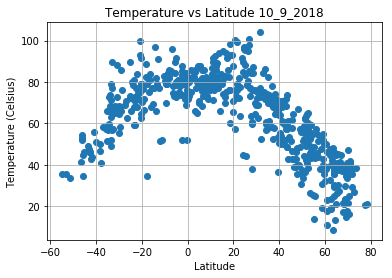

In [14]:
# build a scatter plot for each data type
plt.scatter(weather_data["lat"],weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature vs Latitude 10_9_2018")
plt.ylabel("Temperature (Celsius)") 
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Temperature_vs_Latitude_10_9_2018.png")

# show plot
plt.show

# Humidity (%) vs. Latitude Plot

<function matplotlib.pyplot.show(*args, **kw)>

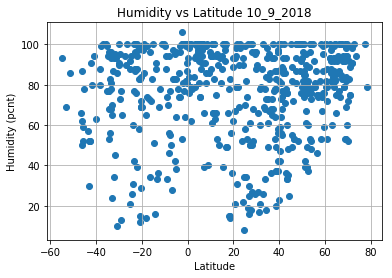

In [15]:
# build a scatter plot for each data type
plt.scatter(weather_data["lat"],weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity vs Latitude 10_9_2018")
plt.ylabel("Humidity (pcnt)") 
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Humidity_vs_Latitude_10_9_2018.png")

# show plot
plt.show

# Wind Speed (mph) vs. Latitude Plot

<function matplotlib.pyplot.show(*args, **kw)>

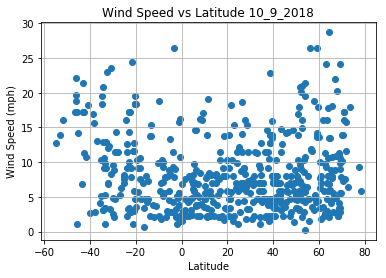

In [16]:
# build a scatter plot for each data type
plt.scatter(weather_data["lat"],weather_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed vs Latitude 10_9_2018")
plt.ylabel("Wind Speed (mph)") 
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Wind Speed_vs_Latitude_10_9_2018.png")

# show plot
plt.show

# Cloudiness (%) vs. Latitude Plot

<function matplotlib.pyplot.show(*args, **kw)>

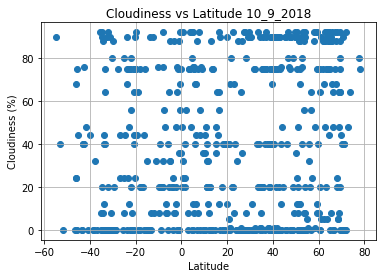

In [17]:
# build a scatter plot for each data type
plt.scatter(weather_data["lat"],weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness vs Latitude 10_9_2018")
plt.ylabel("Cloudiness (%)") 
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("Cloudiness_vs_Latitude_10_9_2018.png")

# show plot
plt.show

# Written description of three observable trends in the data.

This data was collected on 10_9_2018

1 - There is a definate trend to the data for temperature vs latitude.

2 - The wind speed seems to be different at the equator. the distribution of speeds near the equator is lower despersion but the distribution increases as you move away from the equator.

3 - There is no correlation of cloudiness vs lattitude

Jeff Olson